In [1]:
import os
import numpy as np

from remi import System, plot_states, plot_controls, animate

In [ ]:
# Physical Parameters
r_s = np.array([-1.5, 0.])
r_t = np.array([1.5, 0.])
rho = np.array([0.5, 0.5, 0.5, 0.5])
m = np.array([250., 25., 25., 180.])
I = np.array([25., 2.5, 2.5, 18.])
b = np.array([1., 1., 1.])

# Simulation Settings
t_dur = 10.
step_size = 0.01
tol = 0.01
max_tau = (10., 10., 10.)

# Initial Conditions
y0 = np.array([0., 0., 0., 0., np.deg2rad(5.), np.deg2rad(10.), 0., np.deg2rad(-5.)])


# Put parameters and settings in dict
parameters = dict(r_s=r_s,
                  r_t=r_t,
                  rho=rho,
                  m=m,
                  I=I,
                  b=b)

settings = dict(t_dur=t_dur,
                step_size=step_size,
                tol=tol,
                max_tau=max_tau)

# Define system
sys = System(y0, parameters, settings)

In [3]:
# Define event to end propagation
# here, we want to end propagation once the time is more than 5 seconds
def event(t, y, tol):
    return t >= 5.

# Define controls of simulation
def controls(t, y):
    return np.zeros(3)

In [4]:
# Set event and controller
sys.set_controller(controls)
sys.set_event(event)

In [5]:
# Right the simulation
sol = sys.run()

In [6]:
print(f'Sim status: {sol.status}')

Sim status: 1


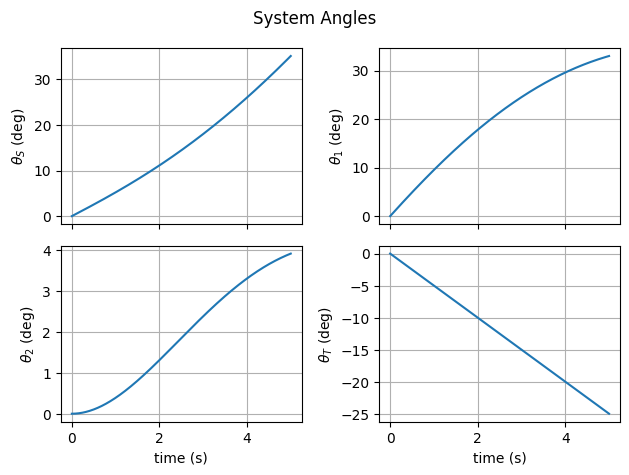

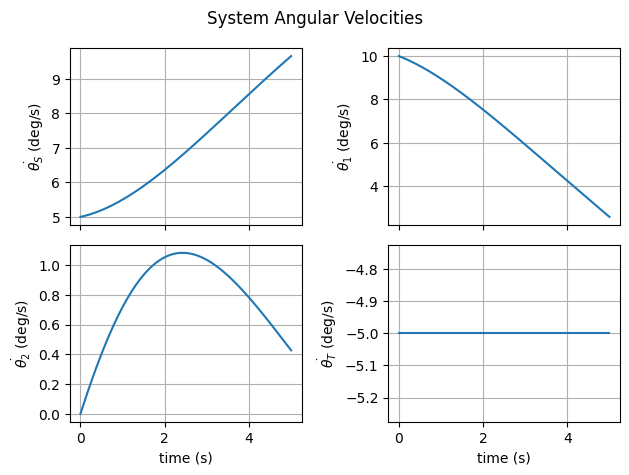

In [7]:
plot_states(sol.t, sol.y, save=False, show=True)

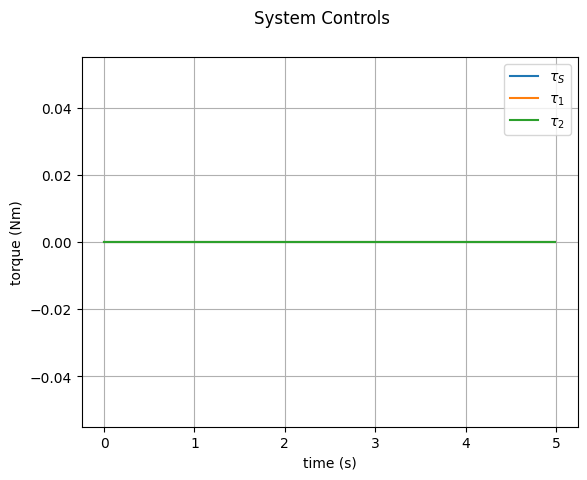

In [8]:
plot_controls(sol.t, sol.u, save=False, show=True)

MovieWriter ffmpeg unavailable; using Pillow instead.


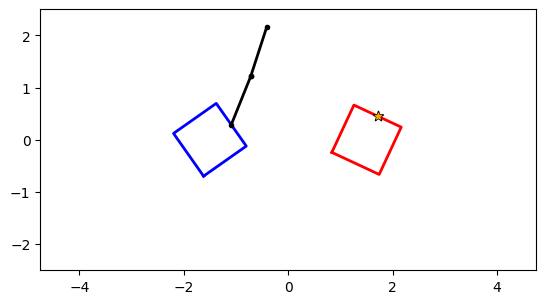

In [9]:
animate(sol.y, parameters, os.getcwd(), blit=True, frames=[i for i in range(len(sol.t)) if i%10 == 0])